In [255]:
#import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Moving Average Crossover Strategy Analysis

In this analysis, we implement a modified strategy using two moving averages:

- **Fast Moving Average (`FAST_MA`)**: A shorter period moving average, responding more quickly to price changes with a 50 day period.
- **Slow Moving Average (`SLOW_MA`)**: The traditional 200-day moving average, providing a longer-term trend signal.

### Strategy Overview
Rather than comparing the stock price to the 200-day MA, we examine the crossovers between the FAST_MA and SLOW_MA. By buying when the FAST_MA crosses above the SLOW_MA (a bullish signal) and selling when it crosses below (a bearish signal), we aim to determine if this dual moving average approach can improve returns compared to the single moving average strategy.



In [256]:
#define variables
SYMBOL = "^GSPC"
FAST_MA = 50
SLOW_MA = 200
STARTING_BALANCE = 10000

In [257]:
#define time period
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2024, 1, 1)
YEARS = (END - START).days / 365.25

In [258]:
#load data into a pandas dataframe
price = yf.download(SYMBOL, start=START, end=END)

price.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [259]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

price.head()

,Open,Close
Date,,
2000-01-03,1469.250000,1455.219971
2000-01-04,1455.219971,1399.420044
2000-01-05,1399.420044,1402.109985
2000-01-06,1402.109985,1403.449951
2000-01-07,1403.449951,1441.469971


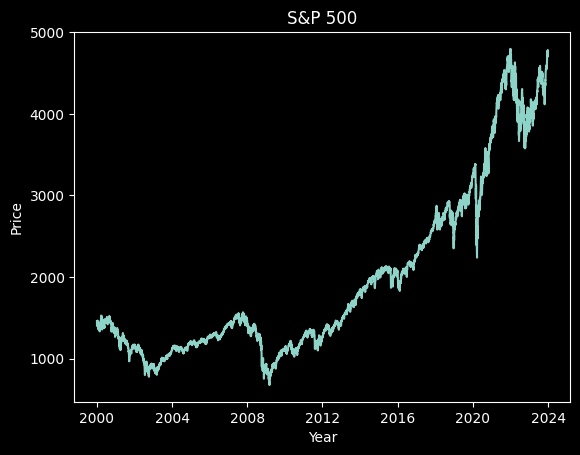

In [260]:
# plot chart
plt.style.use('dark_background')
plt.plot(price.Close)

plt.title('S&P 500')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

In [261]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936


## Calculate Benchmark Drawdown

- **Benchmark Peak**: Tracks the highest cumulative balance reached by the benchmark over time.
- **Benchmark Drawdown**: Calculates the difference between the current balance and the peak to determine any declines from the peak.

The minimum drawdown percentage (`bench_dd`) is calculated to assess the maximum loss from peak value during the period.


In [262]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

## Calculate Fast and Slow Moving Averages

- **Fast Moving Average**: Uses a shorter window (`FAST_MA`) to capture short-term trends.
- **Slow Moving Average**: Uses a 200-day window (`SLOW_MA`) to reflect long-term trends.

The table displays the last few rows with both moving averages.


In [263]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Date,,,,,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032,32961.065373,-288.136341,4468.218584,4335.861046
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721,32961.065373,-149.874651,4477.157988,4340.426846
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743,32961.065373,-102.939630,4485.316992,4345.055946
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987,32961.065373,-90.776386,4493.519990,4349.376246
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936,32961.065373,-183.683436,4502.624590,4353.765747


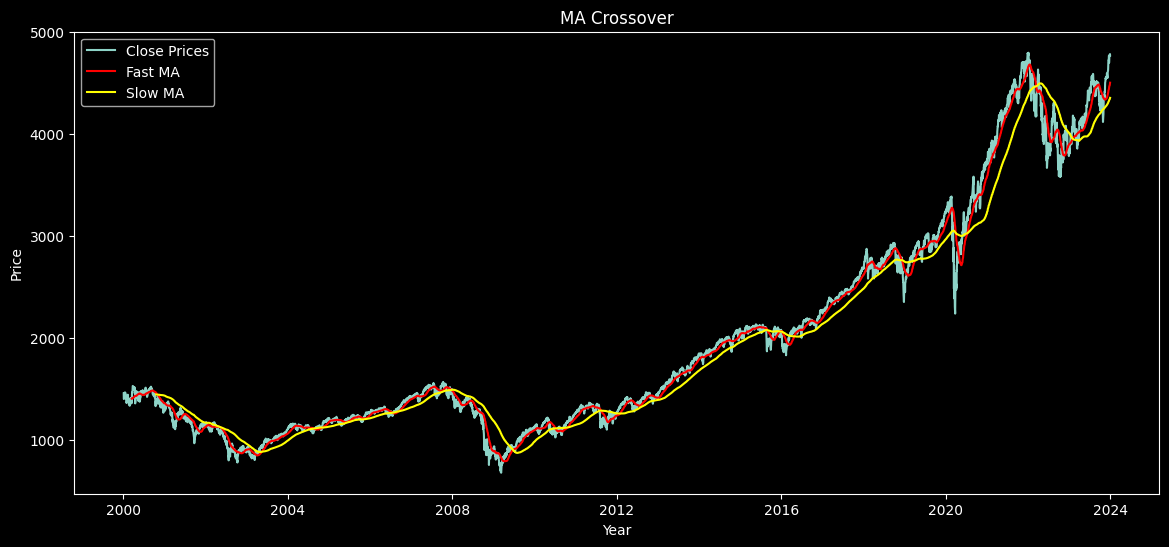

In [264]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close, label="Close Prices")
plt.plot(price.Fast_MA, color="red", label="Fast MA")
plt.plot(price.Slow_MA, color="yellow", label="Slow MA")

plt.title("MA Crossover")
plt.xlabel("Year")
plt.ylabel("Price")

plt.legend()

plt.show()

## Define Entry Signals Based on Moving Average Crossover

The chart above highlights crossover points between the Fast Moving Average (`FAST_MA`) and the Slow Moving Average (`SLOW_MA`), which serve as entry signals.

- **Long Position**: A long position is initiated (True) when the `FAST_MA` crosses above the `SLOW_MA`, indicating a bullish trend.

The table below displays the last few rows with the `Long` position signals.


In [265]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Date,,,,,,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032,32961.065373,-288.136341,4468.218584,4335.861046,True
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721,32961.065373,-149.874651,4477.157988,4340.426846,True
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743,32961.065373,-102.939630,4485.316992,4345.055946,True
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987,32961.065373,-90.776386,4493.519990,4349.376246,True
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936,32961.065373,-183.683436,4502.624590,4353.765747,True


## Calculate System Balance

- **System Return (`Sys_Ret`)**: The return for each day is based on the previous day's `Long` position. If a position is held (`Long` is True), the return is the daily return; otherwise, it's set to 1 (no change).
- **System Balance (`Sys_Bal`)**: The cumulative balance is calculated by applying the system returns (`Sys_Ret`) to the initial balance (`STARTING_BALANCE`), tracking growth over time.

The table below displays the last few rows, including the calculated system returns and balance.


In [266]:
#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032,32961.065373,-288.136341,4468.218584,4335.861046,True,1.001660,41394.475715
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721,32961.065373,-149.874651,4477.157988,4340.426846,True,1.004232,41569.644282
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743,32961.065373,-102.939630,4485.316992,4345.055946,True,1.001430,41629.107902
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987,32961.065373,-90.776386,4493.519990,4349.376246,True,1.000370,41644.517940
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936,32961.065373,-183.683436,4502.624590,4353.765747,True,0.997174,41526.810751


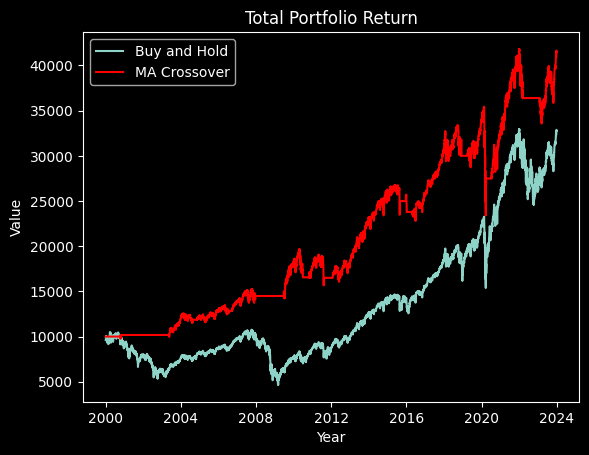

In [267]:
plt.plot(price.Bench_Bal, label="Buy and Hold")
plt.plot(price.Sys_Bal, color="red", label="MA Crossover")

plt.title("Total Portfolio Return")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

## Calculate System Drawdown

We use a similar approach as the previous analysis to calculate the System Drawdown. This helps us understand what is the biggest decline that has happened by following the MA Crossover strategy during the selected period.

- **System Peak (`Sys_Peak`)**: Tracks the highest value reached by the system balance (`Sys_Bal`) over time.
- **System Drawdown (`Sys_DD`)**: Measures the decline from the peak value to the current system balance, indicating potential losses.
- **Maximum Drawdown**: The maximum drawdown is calculated as the largest percentage decline from the peak.

The final result (`sys_dd`) represents the system's maximum drawdown of -33.92%.


In [268]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-33.92


## Calculate Performance Metrics

We calculate the key performance metrics as we did in the last analysis for both the benchmark and the system strategy:

- **Total Return**: Measures the overall percentage change in value.
- **CAGR (Compound Annual Growth Rate)**: Calculates the annual growth rate over the period.
- **Drawdown**: Measures the maximum loss from a peak value.
- **Time in Market**: Tracks the percentage of time the system holds a position.

The calculated metrics are printed for both the benchmark and system strategies to assess and compare their performance.


In [269]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 240.84%
Benchmark CAGR: 5.24
Benchmark DD: -56.78%

System Total return: 315.27%
System CAGR: 6.11
System DD: -33.92%
System Time in the Market: 66.52%


## Backtest Function with Dual Moving Averages

The `backtest` function evaluates a strategy using two moving averages:

- **Inputs**:
  - `price`: DataFrame containing stock price data.
    
  - `period_fast`: The window for calculating the fast moving average.
    
  - `period_slow`: The window for calculating the slow moving average.

- **Calculations**:
  - **Fast and Slow Moving Averages**: Calculates both moving averages based on the given periods.
    
  - **Entry Signal**: Buys when the Fast Moving Average crosses above the Slow Moving Average.
 
  - **System Return**: Calculates daily returns based on positions held, with a return of 1 on non-trading days.
 
  - **System Balance**: Tracks the cumulative balance using the system return.

- **Output**: Returns the Compound Annual Growth Rate (CAGR) for the system strategy based on the dual moving average crossover.


In [270]:
def backtest(price, period_fast, period_slow):
    #calculate moving averages
    price['Fast_MA'] = price.Close.rolling(window = period_fast).mean()
    price['Slow_MA'] = price.Close.rolling(window = period_slow).mean()

    #Hold a position for every day the close is above the MA
    price['Long'] = price.Fast_MA > price.Slow_MA
    
    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    
    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100
    
    return cagr_system

## Evaluating Optimal Moving Average Combinations

Using the backtest function, we explore the performance of various moving average combinations to identify the most effective pairing for maximising returns.

- **Period Ranges**:
  - `periods_slow`: Slow moving average windows ranging from 170 to 295 days, incremented by 5.

  - `periods_fast`: Fast moving average windows ranging from 5 to 105 days, incremented by 5.

- **Backtesting Loop**: For each slow period, the backtest is run across all fast periods, with the resulting CAGR values saved in a nested list (`results_full`). This enables analysis of the strategy’s performance across a broad set of moving average combinations.

These results will help identify the fast and slow moving average pairings that deliver the highest returns.


In [271]:
periods_slow = []
periods_fast = []
periods_slow.extend(range(170, 295, 5))
periods_fast.extend(range(5, 105, 5))

cagr = {}

results_full = []

for slow in periods_slow:
    results_fast = []
    for fast in periods_fast:
        result = backtest(price, fast, slow)
        results_fast.append(result)
    results_full.append(results_fast)

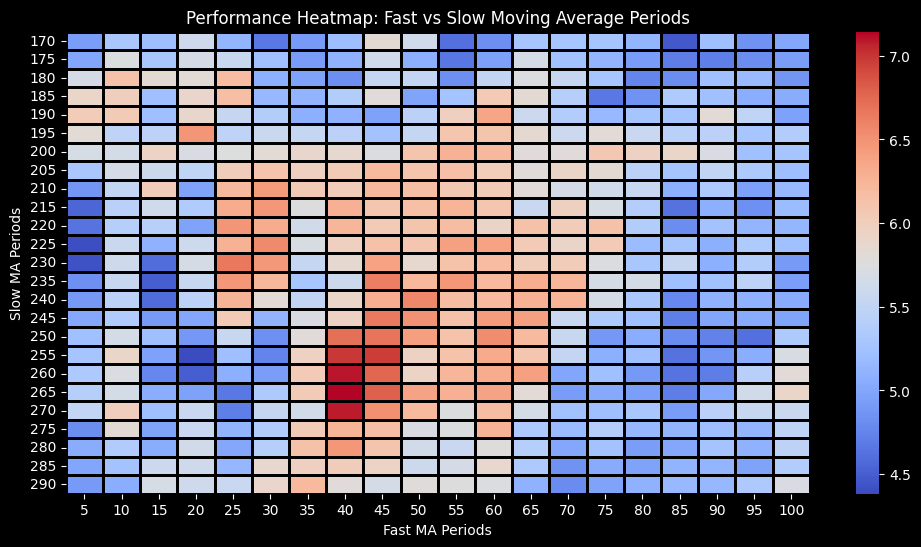

In [290]:
# Plot graph
plt.figure(figsize=(12, 6))
sns.heatmap(results_full,
            cmap="coolwarm",
            xticklabels=periods_fast,
            yticklabels=periods_slow,
            linewidth=1,
            linecolor="black"
           )

# Add labels and title
plt.xlabel("Fast MA Periods")
plt.ylabel("Slow MA Periods")
plt.title("Performance Heatmap: Fast vs Slow Moving Average Periods")

plt.show()

## Heatmap Analysis for Optimal CAGR


The heatmap above highlights the highest CAGRs achieved across different moving average period combinations. The darker red area on the centre-left suggests that a Fast Moving Average of 40 days, paired with a Slow Moving Average of approximately 265 days, provides the best CAGR over the 24-year period.


The heatmap above illustrates the highest Compound Annual Growth Rates (CAGRs) achieved across different combinations of Fast and Slow Moving Average periods. Each cell represents a unique pairing, with colours indicating performance—ranging from blue (lower CAGR ~4.4%) to red (higher CAGR ~7.1). 

The darker red area on the centre-left suggests that using a Fast Moving Average of around 40 days, paired with a Slow Moving Average of approximately 265 days, yields the highest CAGR over the 24-year period analysed.


In [289]:
min_cagr= min(list(map(min, results_full)))
max_cagr = max(list(map(max, results_full)))


print(f'Min CAGR: {min_cagr}')
print(f'Max CAGR: {max_cagr}')

Min CAGR: 4.382713660259707
Max CAGR: 7.143775170310285


## Optimal Fast & Slow MA

Here we use a for loop to search through a list of lists, `results_full`, to locate a specific value, `max_cagr`. Once it finds `max_cagr`, it retrieves its position within the sublist and stores the relevant indices.

After identifying where `max_cagr` is located, it uses the indices to print out three pieces of information:

- **Fast MA**: The "Fast Moving Average" period, which corresponds to the position of `max_cagr` within the inner list.
- **Slow MA**: The "Slow Moving Average" period, associated with the outer list where `max_cagr` was found.
- **CAGR**: The actual Compound Annual Growth Rate value, rounded to two decimal places and formatted as a percentage.

In [274]:
for i, x in enumerate(results_full):
    if max_cagr in x:
        s = results_full[i].index(max_cagr)
        f = i

print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

Fast MA: 40
Slow MA: 265
CAGR: 7.14%


## Maximising the return

Based on the information above we use the 40 and 265 periods for our moving average to generate reviewed results.

In [283]:
opt_fast_ma = 40
opt_slow_ma = 265


price['Opt_Fast_MA'] = price.Close.rolling(window = opt_fast_ma).mean()
price['Opt_Slow_MA'] = price.Close.rolling(window = opt_slow_ma).mean()

#define entries
price['Long'] = price.Opt_Fast_MA > price.Opt_Slow_MA

#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal,Sys_Peak,Sys_DD,Sys_Return,Sys_Balance,Opr_Fast_MA,Opt_Slow_MA,Opt_Fast_MA
Date,,,,,,,,,,,,,,,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032,32961.065373,-288.136341,4437.906992,4220.769483,True,1.001660,52218.029095,41826.070038,-431.594323,1.001660,37803.822080,4468.218584,4248.432376,4518.270972
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721,32961.065373,-149.874651,4440.635591,4223.782207,True,1.004232,52438.999578,41826.070038,-256.425756,1.004232,37963.796116,4477.157988,4251.360338,4534.705469
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743,32961.065373,-102.939630,4443.671094,4226.918759,True,1.001430,52514.011351,41826.070038,-196.962137,1.001430,38018.101722,4485.316992,4254.531357,4550.074475
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987,32961.065373,-90.776386,4446.320195,4230.116173,True,1.000370,52533.450705,41826.070038,-181.552098,1.000370,38032.175058,4493.519990,4257.736754,4564.813232
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936,32961.065373,-183.683436,4449.024697,4233.599415,True,0.997174,52384.966219,41826.070038,-299.259287,0.997174,37924.678065,4502.624590,4260.779471,4578.112488


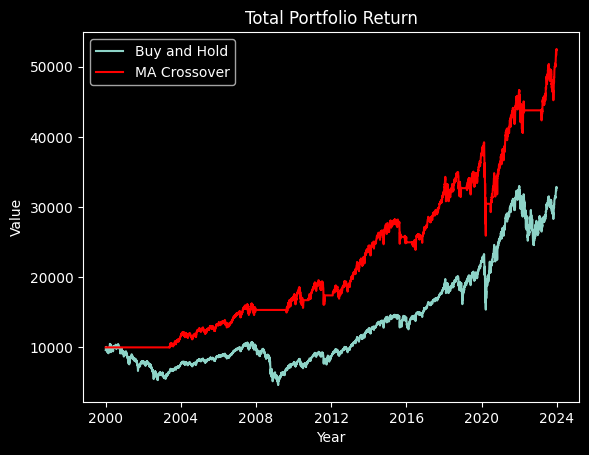

In [284]:
plt.plot(price.Bench_Bal, label="Buy and Hold")
plt.plot(price.Sys_Bal, color="red", label="MA Crossover")

plt.title("Total Updated Portfolio Return")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

In [285]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak
sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 240.84%
Benchmark CAGR: 5.24
Benchmark DD: -56.78%

System Total return: 423.85%
System CAGR: 7.14
System DD: -33.92%
System Time in the Market: 68.01%


## Conclusion

The Moving Average is a straightforward yet effective indicator that provides insights into an index's performance based on its recent trends. Its flexibility in period selection allows for a comprehensive view of market behaviour across various time frames.

In this analysis, we utilised two moving averages to guide buy and sell decisions. This approach enabled the portfolio to outperform a simple buy-and-hold strategy while maintaining a similar drawdown to the benchmark, even with only 2/3 of the capital actively invested.

Extensive backtesting of different moving average combinations helped us identify the optimal moving averages for maximum returns over the past 24 years. The results demonstrate a significant improvement in returns compared to the benchmark, showcasing the potential of a moving average crossover strategy to enhance performance.
